In [7]:
import vnstock as vns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from MFI import add_mfi
from RSI import add_rsi
from MACD import add_macd
from cosine import cosine
from bollinger_bands import add_bollinger_bands

In [8]:
ticker = 'VCB'

In [9]:
df = vns.stock_historical_data(symbol = ticker, start_date="2014-01-01", 
                            end_date='2024-06-01', resolution='1D', type='stock')


In [10]:
df = df[round(len(df)*3/4):]

In [11]:

def calculate_indicators(data):
    add_mfi(data)
    
    data = data[['time', 'close', 'MFI']]

    # data.set_index('time', inplace = True)

    data = data.dropna()

    data['sma10'] = data['close'].rolling(window = 10, min_periods = 1).mean()
    
    data['sma50'] = data['close'].rolling(window = 50, min_periods = 1).mean()
    
    data['ema'] = data['close'].ewm(span = 10).mean()
    
    add_bollinger_bands(data)

    add_rsi(data)

    add_macd(data)

    data.dropna(inplace = True)
    
    data.reset_index(inplace = True, drop = True)

    return data


In [12]:
df = calculate_indicators(df)
df

,time,close,MFI,sma10,sma50,ema,SMA,SD,UB,LB,RSI,EMA12,EMA26,MACD,Signal_Line
0,2021-11-19,63650,43.179824,64007.7,63783.300000,63919.581241,63783.30,831.132588,65445.565176,62121.034824,46.697154,63847.070461,63423.749184,423.321278,535.448853
1,2021-11-22,64769,44.081650,64046.7,63830.238095,64076.338809,63937.25,697.383597,65332.017194,62542.482806,54.252072,63988.905775,63523.397392,465.508383,521.460759
2,2021-11-23,64959,38.210211,64177.6,63881.545455,64238.787892,64104.20,478.891989,65061.983977,63146.416023,66.172473,64138.151040,63629.738326,508.412714,518.851150
3,2021-11-24,68700,50.366066,64649.6,64091.043478,65058.026159,64389.20,1091.474936,66572.149873,62206.250127,81.643872,64839.973957,64005.313265,834.660692,582.013058
4,2021-11-25,70210,60.323262,65226.6,64346.000000,66002.396504,64691.20,1695.886931,68082.973863,61299.426137,83.909262,65666.131810,64464.919690,1201.212120,705.852871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2024-05-27,90200,21.661948,91110.0,92956.000000,91015.243625,91605.00,923.081225,93451.162449,89758.837551,42.857143,91121.723651,91694.557331,-572.833681,-477.796667
626,2024-05-28,90700,29.435584,91120.0,92850.000000,90957.926602,91590.00,935.780001,93461.560002,89718.439998,50.877193,91056.843089,91620.886418,-564.043329,-495.045999
627,2024-05-29,89800,28.503505,91000.0,92746.000000,90747.394493,91520.00,1015.459450,93550.918900,89489.081100,40.322581,90863.482614,91486.005942,-622.523329,-520.541465
628,2024-05-30,88600,26.309427,90600.0,92638.000000,90356.959131,91355.00,1201.523156,93758.046312,88951.953688,15.517241,90515.254519,91272.227724,-756.973205,-567.827813


In [13]:
df_len = len(df)
train_length = 0.8
start_global = round(df_len * train_length)
df_train = df[:start_global]
df_test = df[start_global:]

In [14]:
df_train

,time,close,MFI,sma10,sma50,ema,SMA,SD,UB,LB,RSI,EMA12,EMA26,MACD,Signal_Line
0,2021-11-19,63650,43.179824,64007.7,63783.300000,63919.581241,63783.30,831.132588,65445.565176,62121.034824,46.697154,63847.070461,63423.749184,423.321278,535.448853
1,2021-11-22,64769,44.081650,64046.7,63830.238095,64076.338809,63937.25,697.383597,65332.017194,62542.482806,54.252072,63988.905775,63523.397392,465.508383,521.460759
2,2021-11-23,64959,38.210211,64177.6,63881.545455,64238.787892,64104.20,478.891989,65061.983977,63146.416023,66.172473,64138.151040,63629.738326,508.412714,518.851150
3,2021-11-24,68700,50.366066,64649.6,64091.043478,65058.026159,64389.20,1091.474936,66572.149873,62206.250127,81.643872,64839.973957,64005.313265,834.660692,582.013058
4,2021-11-25,70210,60.323262,65226.6,64346.000000,66002.396504,64691.20,1695.886931,68082.973863,61299.426137,83.909262,65666.131810,64464.919690,1201.212120,705.852871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2023-11-17,85600,71.149111,87400.0,87028.000000,86975.631792,86910.00,1638.002635,90186.005270,83633.994730,36.134454,86993.126826,86951.824391,41.302435,144.297954
500,2023-11-20,86100,64.942404,87060.0,86980.000000,86816.426012,86990.00,1550.857148,90091.714297,83888.285703,35.593220,86855.722699,86888.726288,-33.003589,108.837645
501,2023-11-21,86600,64.291224,86890.0,86914.000000,86777.075828,87020.00,1536.434697,90092.869395,83947.130605,42.342342,86816.380745,86867.339155,-50.958410,76.878434
502,2023-11-22,86700,58.651498,86610.0,86866.000000,86763.062041,87065.00,1511.804429,90088.608858,84041.391142,36.000000,86798.476015,86854.943662,-56.467647,50.209218


In [15]:
def RSI_signal(data, index):
    if data['RSI'].iloc[index] <= 70 and data['RSI'].iloc[index - 1] >= 70:
        return -1
    elif data['RSI'].iloc[index] >= 30 and data['RSI'].iloc[index - 1] <= 30:
        return 1
    else:
        return 0

In [16]:
def MFI_signal(data, index):
    if data['MFI'].iloc[index] <= 80 and data['MFI'].iloc[index - 1] >= 80:
        return -1
    elif data['MFI'].iloc[index] >= 20 and data['MFI'].iloc[index - 1] <= 20:
        return 1
    else:
        return 0

In [17]:
def MACD_signal(data, index):
    if data['MACD'].iloc[index] >= data['Signal_Line'].iloc[index] and \
        data['MACD'].iloc[index - 1] <= data['Signal_Line'].iloc[index - 1]:
        return -1
    elif data['MACD'].iloc[index] <= data['Signal_Line'].iloc[index] and \
        data['MACD'].iloc[index - 1] >= data['Signal_Line'].iloc[index - 1]:
        return 1    
    else:
        return 0

In [18]:
def bollinger_bands_signal(data, index):
    if data['close'].iloc[index] <= data['LB'].iloc[index] and \
        data['close'].iloc[index - 1] >= data['LB'].iloc[index - 1]:
        return 1
    elif data['close'].iloc[index] >= data['UB'].iloc[index] and \
        data['close'].iloc[index - 1] <= data['UB'].iloc[index - 1]:
        return -1
    else:
        return 0

In [33]:
def pattern_matching(df, start, window, indicator):
    df_temp = df_test[indicator].iloc[start:start+window]
    df_window = df_train[indicator].copy()  #Includes the current date
    df_window -= df_window.iloc[0]
    cosines = []
    for i in range(len(df_window)-window):
        df_compare = df_window.iloc[i:i+window].copy()
        df_compare -= df_compare.iloc[0]
        cosines.append(cosine(df_temp, df_compare, window))
    return cosines.index(max(cosines))

In [34]:
def matching_signal(data, index):
    pattern_start = pattern_matching(data, index, window, indicator)
    predicted_earnings = data[indicator].iloc[pattern_start + window + forward_window - 1] - data[indicator].iloc[pattern_start + window - 1]
    
    if predicted_earnings > 0:
        return 0.25
    else:
        return -0.25

In [35]:
pattern_matching(df_test, 50, 5, 'close')

243

In [ ]:
signal_dict = {'MFI': MFI_signal, 'MACD': MACD_signal, 'bollinger_bands': bollinger_bands_signal, 'RSI': RSI_signal, 'matching': matching_signal}

def calculate_signal(data, index, signal_list):
    temp = 0
    for signal in signal_list:
        temp += signal_dict[signal](data, index)
    return temp

In [ ]:
df.shape

(630, 15)

In [ ]:
df_train.shape

(504, 15)

In [ ]:
# For testing parameters

profit_and_loss = {}

for i in range(1,41):
    for j in range(1,31):
        indicator = 'close'
        start = 0  # At which point to start investing
        df_matching = df_train.copy()
        budget = 10000000  # How much money to start with, doesnt really matter
        total_assets = [10000000]
        window = 5
        forward_window = 0
        stocks_holding = 0
        buy_points = []
        sell_points = []
        signal = 0
        signal_list = ['MFI', 'MACD', 'bollinger_bands', 'RSI']

        upper_signal = i/10
        lower_signal = -i/10
        decay = j/10

        while start + forward_window < len(df_matching):
            current_price = df_matching['close'].iloc[start]
            signal = signal + calculate_signal(df_matching, start, signal_list)
            if signal >= upper_signal:
                stocks_to_buy = (budget // 2) // current_price  #Spends half the budget to buy
                
                if stocks_to_buy > 0:
                    budget -= stocks_to_buy * current_price
                    stocks_holding += stocks_to_buy
                    buy_points.append(start)
                    
            elif (signal <= lower_signal) and (stocks_holding > 0):
                sell_points.append(start)
                stocks_sold = stocks_holding
                if stocks_holding == 1:
                    stocks_sold = 1
                budget += stocks_sold * current_price
                stocks_holding -= stocks_sold 

            total_assets.append(budget + stocks_holding*current_price)
            start += 1

            if signal >= 0:
                signal = max(0, signal - decay)
            elif signal < 0:
                signal = min(0, signal + decay)
            # Decaying the signal

        current_price = df_matching['close'].iloc[-1]
        total_assets.append(budget + stocks_holding * current_price)

        profit_and_loss[((total_assets[-1] - total_assets[0])/total_assets[0]) * 100] = [i/10, j/10]

In [ ]:
train_results = sorted([[x,y] for (x,y) in list(profit_and_loss.items())], key= lambda x: x[0], reverse = True)

In [ ]:
train_results

[[44.05401, [2.4, 0.1]],
 [37.4701, [2.2, 0.1]],
 [36.4755, [2.3, 0.1]],
 [33.78736, [2.9, 0.1]],
 [32.90242, [2.5, 0.1]],
 [32.29519, [2.7, 0.1]],
 [30.85216, [3.0, 0.1]],
 [30.54716, [3.1, 0.1]],
 [28.47869, [2.8, 0.1]],
 [26.85496, [1.8, 0.2]],
 [26.83296, [1.7, 0.2]],
 [26.654099999999996, [2.0, 0.1]],
 [26.251799999999996, [2.1, 0.1]],
 [25.40347, [3.2, 0.1]],
 [24.8706, [1.8, 0.1]],
 [24.70693, [1.3, 0.3]],
 [24.6067, [1.6, 0.2]],
 [24.5837, [1.5, 0.2]],
 [23.94149, [2.0, 0.2]],
 [23.83825, [1.2, 0.4]],
 [23.254910000000002, [1.1, 0.3]],
 [22.20417, [2.2, 0.2]],
 [22.12677, [3.3, 0.1]],
 [22.047330000000002, [1.4, 0.3]],
 [20.1047, [1.4, 0.2]],
 [19.750400000000003, [1.7, 0.1]],
 [17.78387, [0.4, 0.6]],
 [16.32759, [0.7, 0.4]],
 [16.158, [0.9, 0.1]],
 [16.065199999999997, [3.6, 0.1]],
 [15.90849, [0.8, 0.4]],
 [15.689990000000002, [0.5, 0.5]],
 [15.5277, [1.2, 0.2]],
 [15.271399999999998, [1.6, 0.1]],
 [15.2106, [0.6, 0.4]],
 [15.19305, [0.1, 0.1]],
 [15.19249, [0.6, 0.7]],
 [15.

In [ ]:
# limit = [train_results[i][1][0] for i in range(len(train_results))]
# trained_decay = train_results[0][1][1]

In [ ]:
limit = np.mean([train_results[i][1][0] for i in range(len(train_results))][:5])
trained_decay = np.mean([train_results[i][1][1] for i in range(len(train_results))][:5])

In [ ]:
start = 0  # At which point to start investing
df_matching = df_train.copy()
budget = 1000000  # How much money to start with, doesnt really matter
total_assets = [1000000]
window = 5
forward_window = 0
stocks_holding = 0
buy_points = []
sell_points = []
signal = 0
signal_list = ['MFI', 'MACD', 'bollinger_bands']
upper_signal = limit
lower_signal = -limit
decay = trained_decay

while start + forward_window < len(df_matching):
   current_price = df_matching['close'].iloc[start]
   signal = signal + calculate_signal(df_matching, start, signal_list)
   if signal >= upper_signal:
      stocks_to_buy = (budget // 2) // current_price  #Spends half the budget to buy
      
      if stocks_to_buy > 0:
         budget -= stocks_to_buy * current_price
         stocks_holding += stocks_to_buy
         buy_points.append(start)
         
   elif (signal <= lower_signal) and (stocks_holding > 0):
      
      sell_points.append(start)
      stocks_sold = stocks_holding
      budget += stocks_sold * current_price
      stocks_holding -= stocks_sold

   total_assets.append(budget + stocks_holding*current_price)
   start += 1

   if signal >= 0:
      signal = max(0, signal - decay)
   elif signal < 0:
      signal = min(0, signal + decay)
   # Decaying the signal

   

current_price = df_matching['close'].iloc[-1]
total_assets.append(budget + stocks_holding * current_price)

In [ ]:
print(f'Profit/loss is: {(total_assets[-1] - total_assets[0])/(total_assets[0]) * 100}%')

Profit/loss is: 0.0%


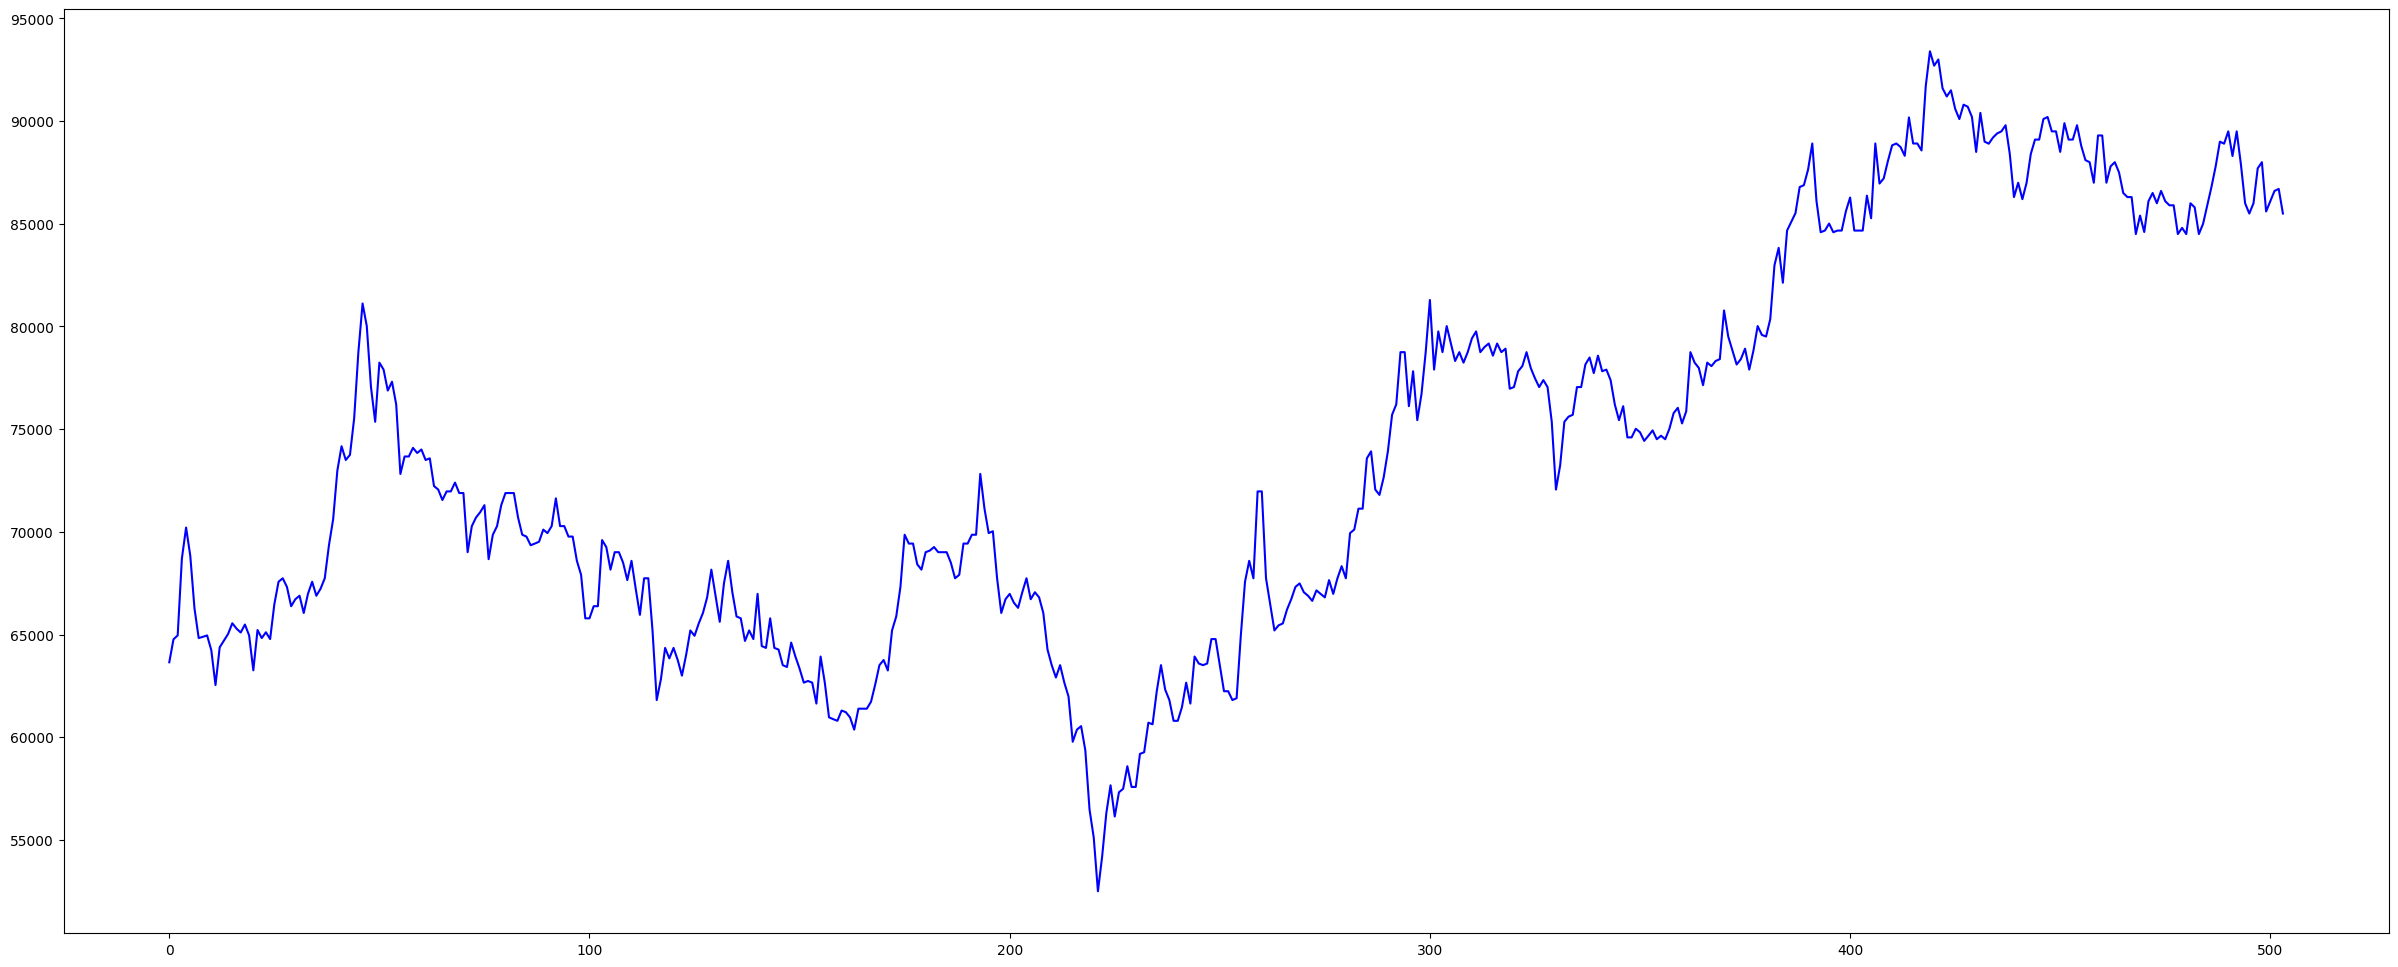

In [ ]:
start = 0
plt.subplots(figsize =(30,12))
plt.plot(df_train['close'], label = "data", color = "b")
plt.plot(df_train.iloc[buy_points].index, df_train['close'].iloc[buy_points],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(df_train.iloc[sell_points].index, df_train['close'].iloc[sell_points],
'^', ms=15, label='Buy Signal', color='red')

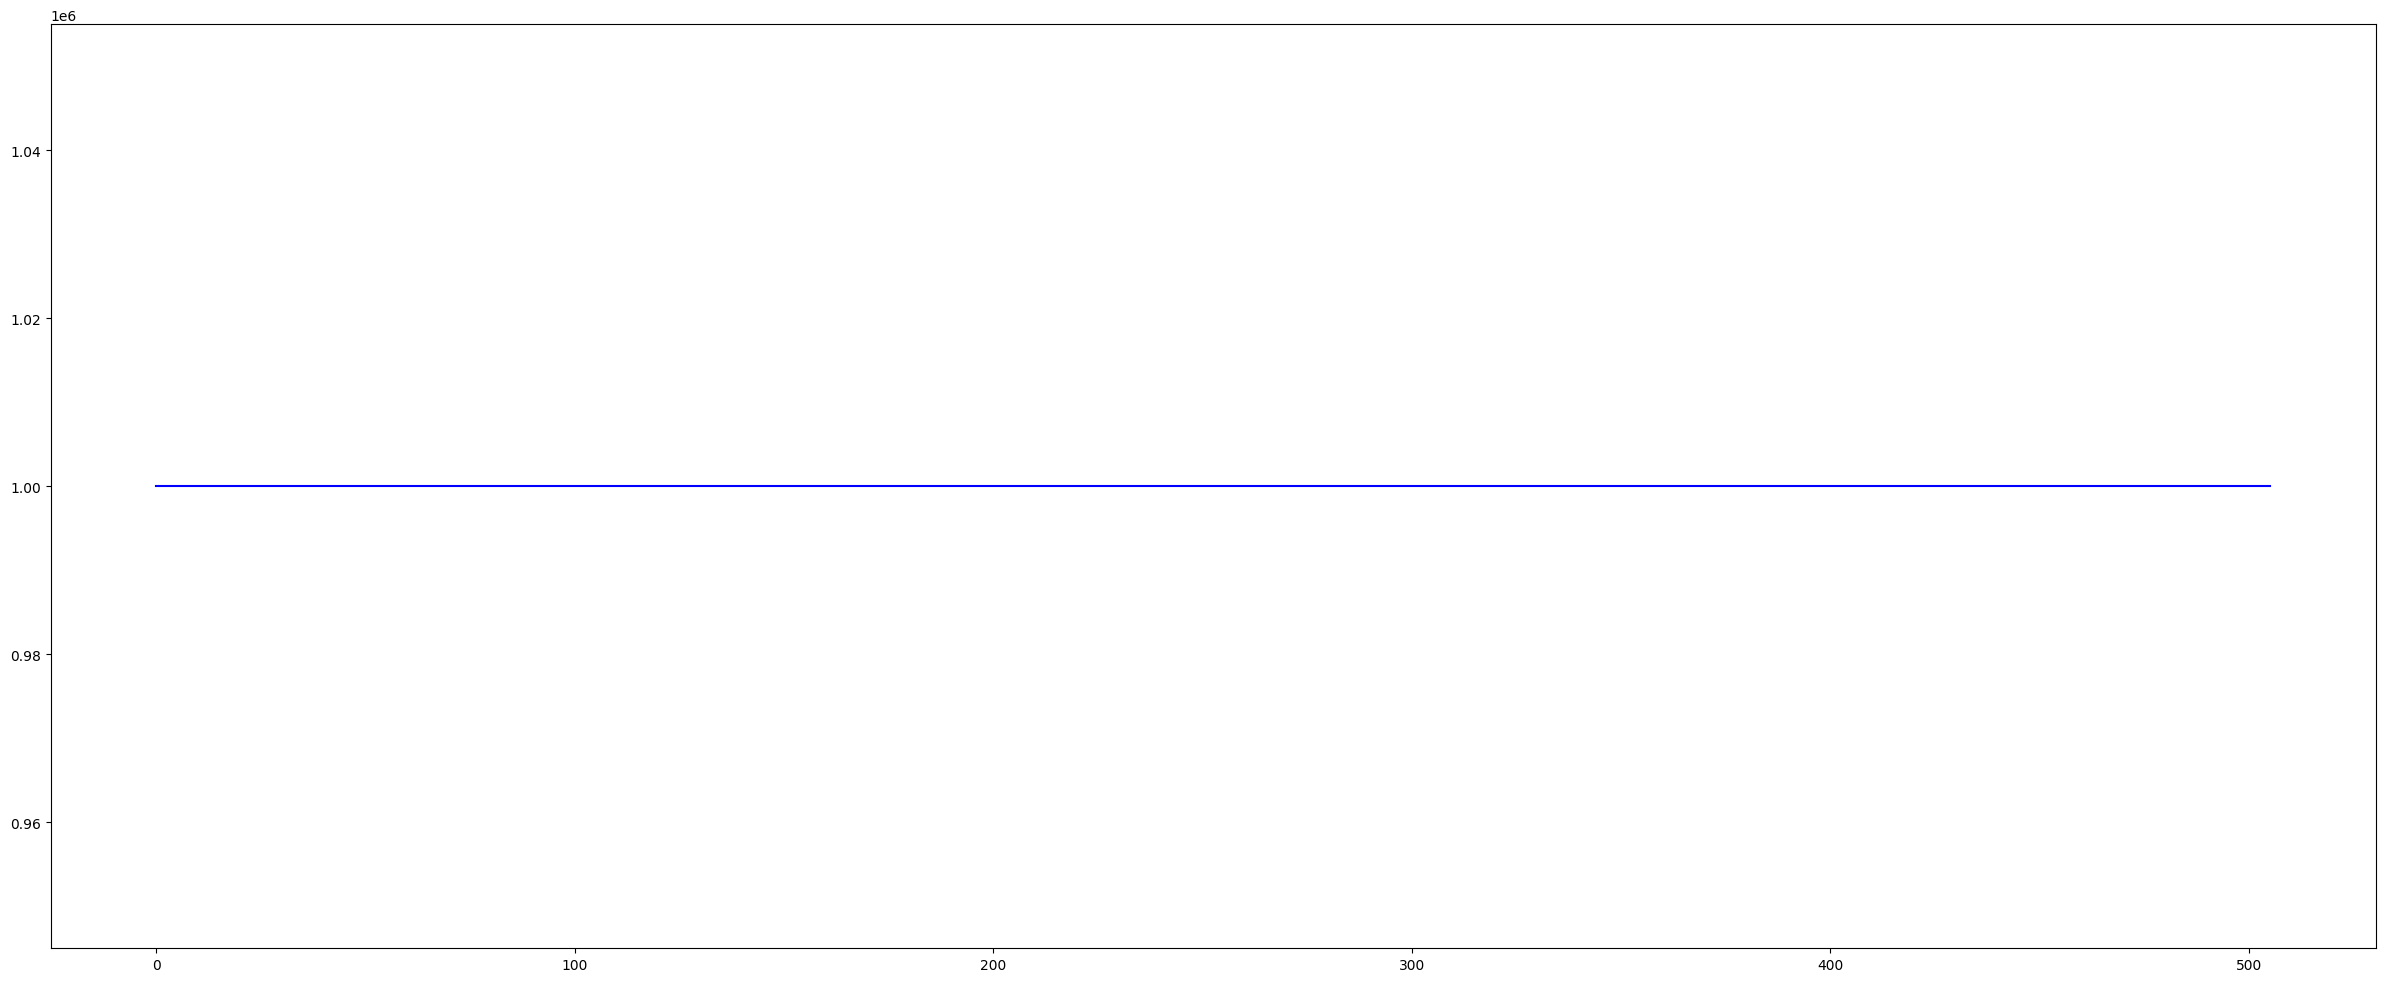

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(total_assets, label = "data", color = "b")

In [ ]:
start = 0  # At which point to start investing
df_matching = df_test.copy()
budget = 1000000  # How much money to start with, doesnt really matter
total_assets = [1000000]
window = 5
forward_window = 0
stocks_holding = 0
buy_points = []
sell_points = []
signal = 0
signal_list = ['MFI', 'MACD', 'bollinger_bands']
upper_signal = limit
lower_signal = -limit
decay = trained_decay

while start + forward_window < len(df_matching):
   current_price = df_matching['close'].iloc[start]
   signal = signal + calculate_signal(df_matching, start, signal_list)
   if signal >= upper_signal:
      stocks_to_buy = (budget // 2) // current_price  #Spends half the budget to buy
      
      if stocks_to_buy > 0:
         budget -= stocks_to_buy * current_price
         stocks_holding += stocks_to_buy
         buy_points.append(start)
         
   elif (signal <= lower_signal) and (stocks_holding > 0):
      
      sell_points.append(start)
      stocks_sold = stocks_holding
      budget += stocks_sold * current_price
      stocks_holding -= stocks_sold

   total_assets.append(budget + stocks_holding*current_price)
   start += 1

   if signal >= 0:
      signal = max(0, signal - decay)
   elif signal < 0:
      signal = min(0, signal + decay)
   # Decaying the signal

   

current_price = df_matching['close'].iloc[-1]
total_assets.append(budget + stocks_holding * current_price)

In [ ]:
print(f'Profit/loss is: {(total_assets[-1] - total_assets[0])/(total_assets[0]) * 100}%')

Profit/loss is: 0.0%


In [ ]:
print(f'Stock grew by: {(df_test['close'].iloc[-1] - df_test['close'].iloc[0])/df_test['close'].iloc[0] * 100}%')
print(f'From {df_test['time'].iloc[0]} to {df_test['time'].iloc[-1]}')

Stock grew by: 1.3953488372093024%
From 2023-11-24 to 2024-05-31


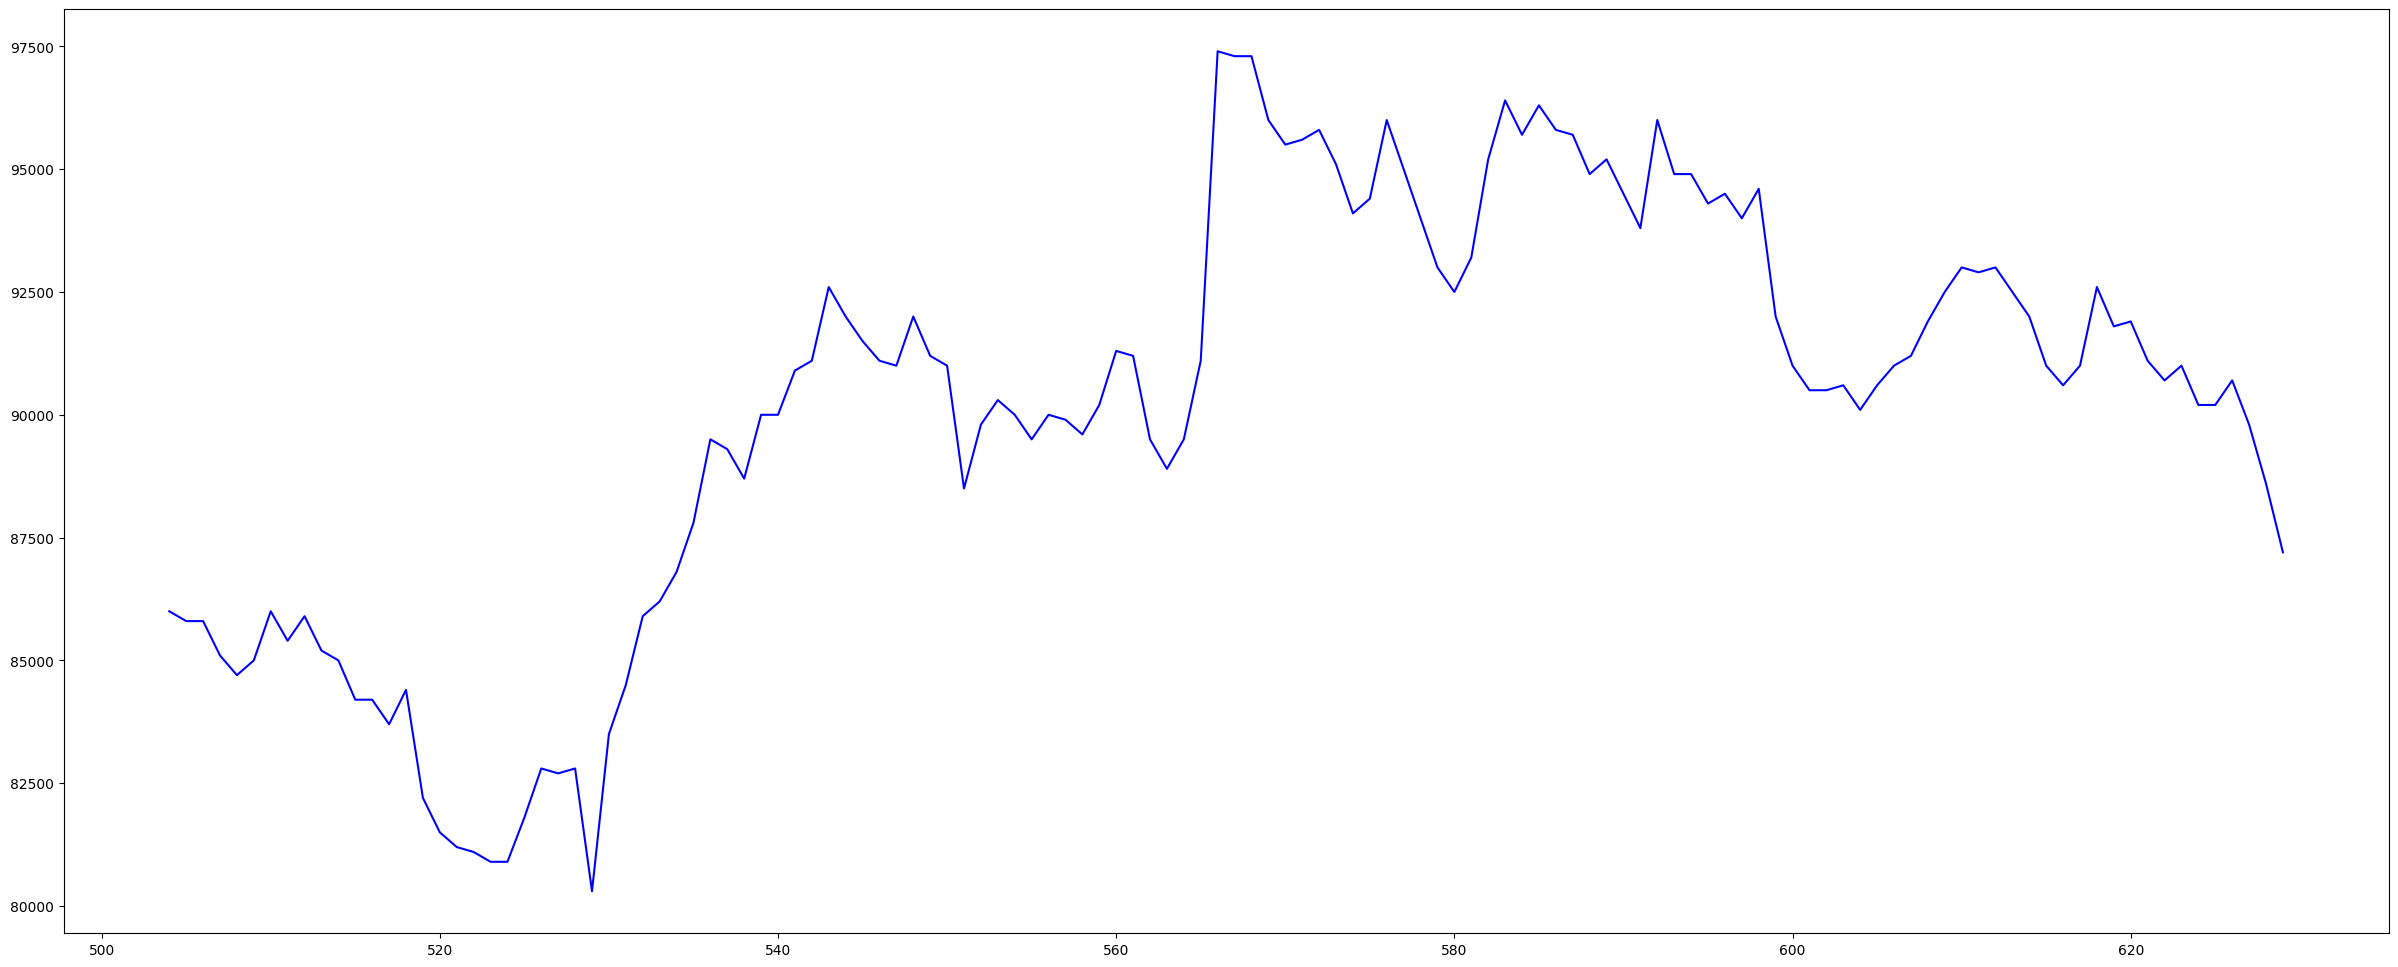

In [ ]:
start = 0
plt.subplots(figsize =(30,12))
plt.plot(df_test['close'], label = "data", color = "b")
plt.plot(df_test.iloc[buy_points].index, df_test['close'].iloc[buy_points],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(df_test.iloc[sell_points].index, df_test['close'].iloc[sell_points],
'^', ms=15, label='Buy Signal', color='red')

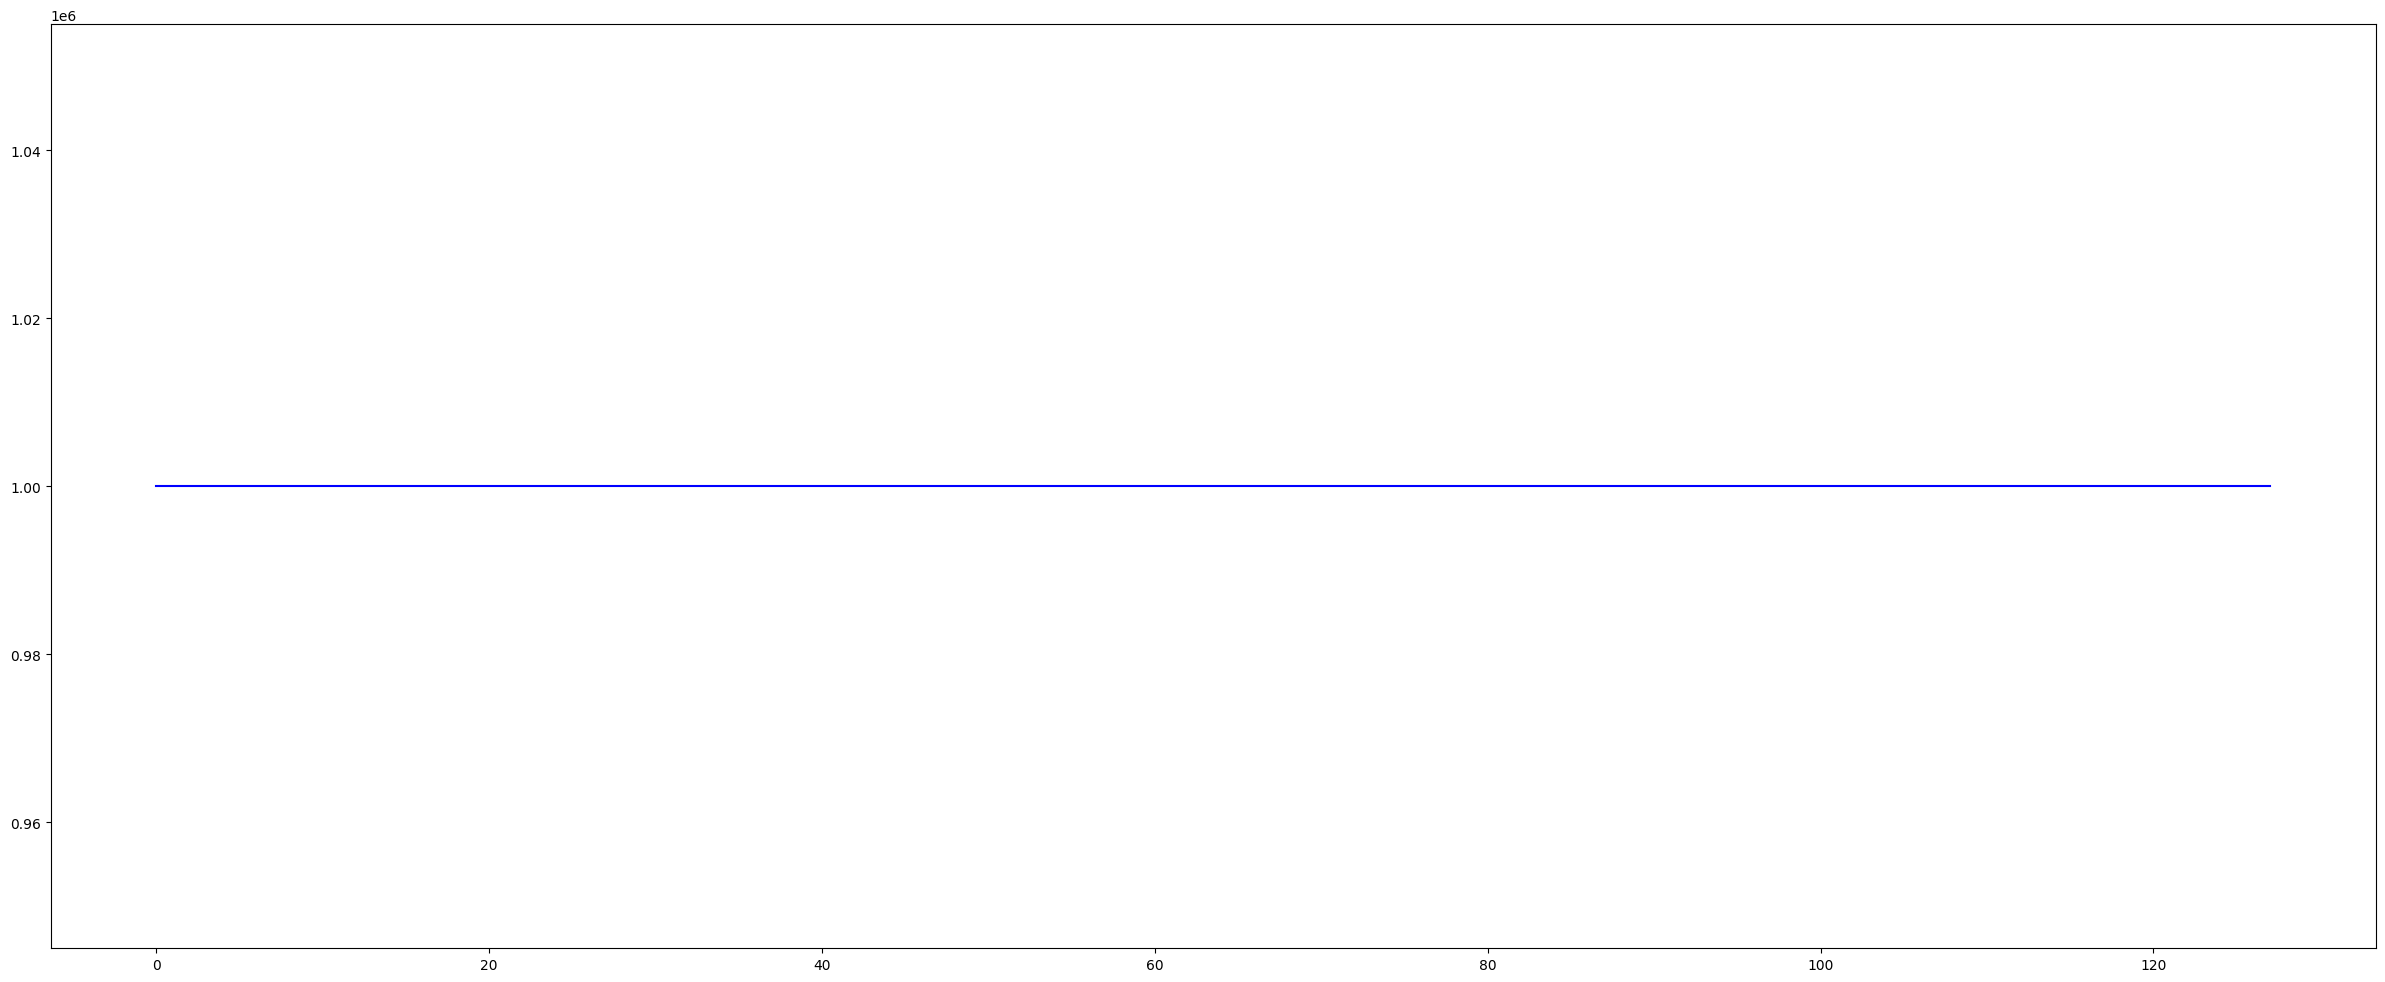

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(total_assets, label = "data", color = "b")